## **Loading the Data**

In [11]:
import pandas as pd

file_path = "Sales_Data.csv"  
data = pd.read_csv(file_path)

In [41]:
print("First 5 rows of the data:")
display(data.head())

First 5 rows of the data:


,Date,Time,State,Group,Unit,Sales,Week,Month
0,2020-10-01,Morning,WA,Kids,0.095238,0.095238,40,10
1,2020-10-01,Morning,WA,Men,0.095238,0.095238,40,10
2,2020-10-01,Morning,WA,Women,0.031746,0.031746,40,10
3,2020-10-01,Morning,WA,Seniors,0.206349,0.206349,40,10
4,2020-10-01,Afternoon,WA,Kids,0.015873,0.015873,40,10


In [13]:
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [14]:
print("\nDescriptive Statistics:")
display(data.describe())


Descriptive Statistics:


,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


## **Data Wrangling**

### *Missing Values*

In [15]:
print("Missing values in each column:")

print(data.isna().sum())

Missing values in each column:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [17]:
data.columns

Index(['Date', 'Time', 'State', 'Group', 'Unit', 'Sales'], dtype='object')

In [19]:
print("\nUnique values in each column:")
cols = ['Time', 'State', 'Group']
for col in data[cols]:
    print(f"{col}: {data[col].unique()}")


Unique values in each column:
Time: [' Morning' ' Afternoon' ' Evening']
State: [' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']
Group: [' Kids' ' Men' ' Women' ' Seniors']


### *Normalize the Data*

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

data[['Unit', 'Sales']] = scaler.fit_transform(data[['Unit', 'Sales']])

print("\nNormalized Data (first 5 rows):")
data.head()


Normalized Data (first 5 rows):


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873


### *Verify Data Cleanliness*

In [22]:
print("\nDataset Info after Cleaning and Normalization:")
data.info()


Dataset Info after Cleaning and Normalization:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    7560 non-null   object 
 1   Time    7560 non-null   object 
 2   State   7560 non-null   object 
 3   Group   7560 non-null   object 
 4   Unit    7560 non-null   float64
 5   Sales   7560 non-null   float64
dtypes: float64(2), object(4)
memory usage: 354.5+ KB


In [23]:
print("\nDescriptive Statistics after Normalization:")
display(data.describe())


Descriptive Statistics after Normalization:


,Unit,Sales
count,7560.000000,7560.000000
mean,0.254054,0.254054
std,0.204784,0.204784
min,0.000000,0.000000
25%,0.095238,0.095238
50%,0.190476,0.190476
75%,0.380952,0.380952
max,1.000000,1.000000


### *Descriptive Statistics*

In [24]:
sales_stats = {
    "Mean": data['Sales'].mean(),
    "Median": data['Sales'].median(),
    "Mode": data['Sales'].mode()[0],
    "Standard Deviation": data['Sales'].std(),
}

In [25]:
unit_stats = {
    "Mean": data['Unit'].mean(),
    "Median": data['Unit'].median(),
    "Mode": data['Unit'].mode()[0],
    "Standard Deviation": data['Unit'].std(),
}

In [26]:
print("\nSales Statistics:")
for key, value in sales_stats.items():
    print(f"{key}: {value}")


Sales Statistics:
Mean: 0.25405433778449654
Median: 0.1904761904761905
Mode: 0.1111111111111111
Standard Deviation: 0.20478417107280047


In [27]:
print("\nUnit Statistics:")
for key, value in unit_stats.items():
    print(f"{key}: {value}")


Unit Statistics:
Mean: 0.2540543377844965
Median: 0.19047619047619047
Mode: 0.1111111111111111
Standard Deviation: 0.20478417107280045


### **Groups with the Highest and Lowest Sales**

#### *State-Wise Analysis*

In [28]:
state_sales = data.groupby('State')['Sales'].sum().sort_values(ascending=False)
highest_state = state_sales.idxmax()
lowest_state = state_sales.idxmin()

In [30]:
print("State with the Highest Sales:")
print(f"{highest_state}: {state_sales[highest_state]}")

State with the Highest Sales:
 VIC: 635.968253968254


In [31]:
print("State with the Lowest Sales:")
print(f"{lowest_state}: {state_sales[lowest_state]}")

State with the Lowest Sales:
 WA: 106.36507936507937


#### *Group-wise total sales*

In [32]:
group_sales = data.groupby('Group')['Sales'].sum().sort_values(ascending=False)
highest_group = group_sales.idxmax()
lowest_group = group_sales.idxmin()

In [33]:
print("Group with the Highest Sales:")
print(f"{highest_group}: {group_sales[highest_group]}")

Group with the Highest Sales:
 Men: 484.44444444444446


In [34]:
print("Group with the Lowest Sales:")
print(f"{lowest_group}: {group_sales[lowest_group]}")

Group with the Lowest Sales:
 Seniors: 473.57142857142856


## Generate  **Weekly, Monthly, and Quarterly Reports**

### Date Column to Datetime Format

In [38]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%Y')
data['Week'] = data['Date'].dt.isocalendar().week
data['Month'] = data['Date'].dt.month

### Weekly Sales Report

In [39]:
weekly_sales = data.groupby('Week')['Sales'].sum()
print("\nWeekly Sales Report:")
print(weekly_sales)



Weekly Sales Report:
Week
40     84.857143
41    152.777778
42    150.476190
43    151.587302
44    122.460317
45    113.809524
46    115.761905
47    115.380952
48    117.698413
49    169.412698
50    181.492063
51    182.317460
52    183.047619
53     79.571429
Name: Sales, dtype: float64


### Monthly Sales Report

In [42]:
monthly_sales = data.groupby('Month')['Sales'].sum()
print("\nMonthly Sales Report:")
print(monthly_sales)


Monthly Sales Report:
Month
10    645.650794
11    495.761905
12    779.238095
Name: Sales, dtype: float64


### Quarterly Sales Report

In [43]:
quarterly_sales = data['Sales'].sum()
print("\nQuarterly Sales Report:")
print(f"Total Sales for Q4 2020: {quarterly_sales}")


Quarterly Sales Report:
Total Sales for Q4 2020: 1920.6507936507937


## Data Visualization

### State-Wise Sales Analysis for Different Demographic Groups

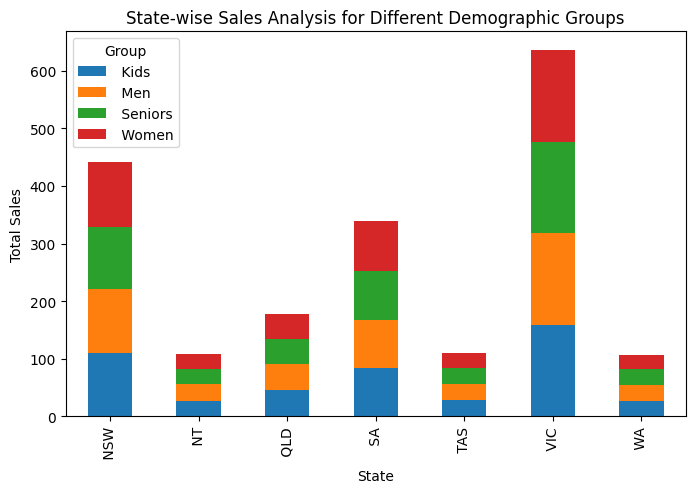

Summary:
The state with the highest total sales is  VIC, with a total sales value of  635.97.
From the stacked bar chart, we can observe how different demographic groups contribute to total sales across various states.


In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

state_group_sales = data.groupby(['State', 'Group'])['Sales'].sum().unstack()

# state_group_sales = state_group_sales.sum(axis=1).sort_values(ascending=False)

state_group_sales.plot(kind='bar', figsize=(8, 5), stacked=True)
plt.title('State-wise Sales Analysis for Different Demographic Groups')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Group')
plt.show()

print("Summary:")
total_sales_by_state = data.groupby('State')['Sales'].sum()
max_sales_state = total_sales_by_state.idxmax()
max_sales_value = total_sales_by_state.max()

print(f"The state with the highest total sales is {max_sales_state}, with a total sales value of {max_sales_value: .2f}.")
print("From the stacked bar chart, we can observe how different demographic groups contribute to total sales across various states.")


### Group-Wise Sales Analysis Across States

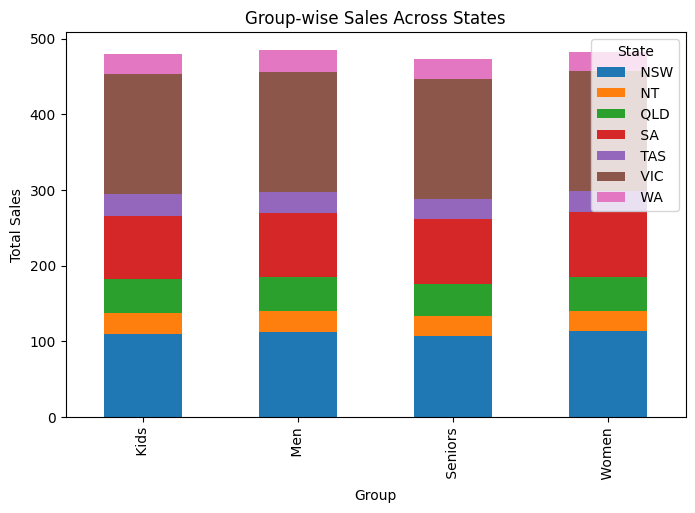

Summary:
The group with the highest total sales across all states is  Men, with a total sales value of 484.44.
The stacked bar chart visualizes sales performance across various states for each group (Kids, Women, Men, Seniors).
From the chart, it can be observed that certain states contribute more significantly to the sales of particular groups.


In [75]:
group_state_sales = data.groupby(['Group', 'State'])['Sales'].sum().unstack()

group_state_sales.plot(kind='bar', figsize=(8, 5), stacked=True)
plt.title('Group-wise Sales Across States')
plt.xlabel('Group')
plt.ylabel('Total Sales')
plt.legend(title='State')
plt.show()

print("Summary:")
total_sales_by_group = data.groupby('Group')['Sales'].sum()
max_sales_group = total_sales_by_group.idxmax()
max_sales_value = total_sales_by_group.max()

print(f"The group with the highest total sales across all states is {max_sales_group}, with a total sales value of {max_sales_value:.2f}.")
print("The stacked bar chart visualizes sales performance across various states for each group (Kids, Women, Men, Seniors).")
print("From the chart, it can be observed that certain states contribute more significantly to the sales of particular groups.")



### Time-of-the-Day Analysis

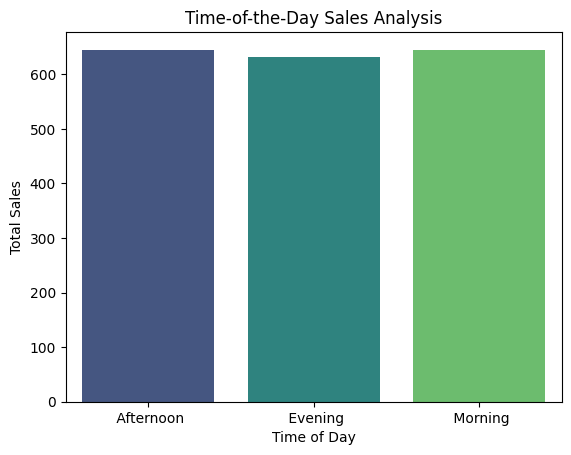

Summary:
The highest sales occur during  Morning with a total sales value of 645.13.
The lowest sales occur during  Evening with a total sales value of 631.67.
The bar chart visualizes sales trends across different times of the day, showing peak and off-peak periods.


In [76]:
time_sales = data.groupby('Time')['Sales'].sum()

sns.barplot(x=time_sales.index, y=time_sales.values, hue=time_sales.index, palette='viridis')
plt.title('Time-of-the-Day Sales Analysis')
plt.xlabel('Time of Day')
plt.ylabel('Total Sales')
plt.show()

print("Summary:")
max_sales_time = time_sales.idxmax()
max_sales_value = time_sales.max()
min_sales_time = time_sales.idxmin()
min_sales_value = time_sales.min()

print(f"The highest sales occur during {max_sales_time} with a total sales value of {max_sales_value:.2f}.")
print(f"The lowest sales occur during {min_sales_time} with a total sales value of {min_sales_value:.2f}.")
print("The bar chart visualizes sales trends across different times of the day, showing peak and off-peak periods.")

### Daily Sales Chart

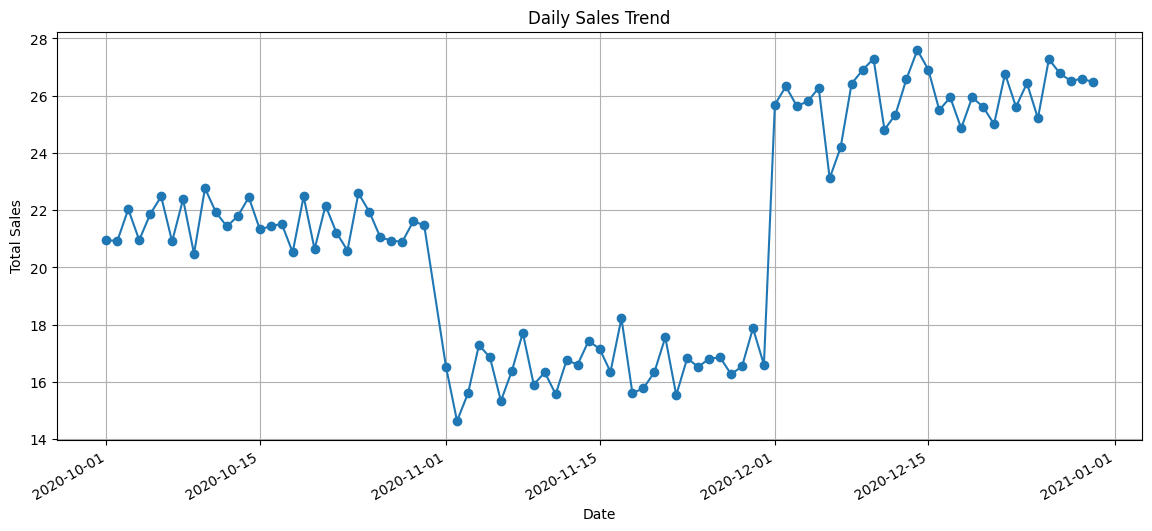

In [51]:
daily_sales = data.groupby('Date')['Sales'].sum()

daily_sales.plot(kind='line', figsize=(14, 6), marker='o')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


### Weekly Sales Chart

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_3796\1290489414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='coolwarm')


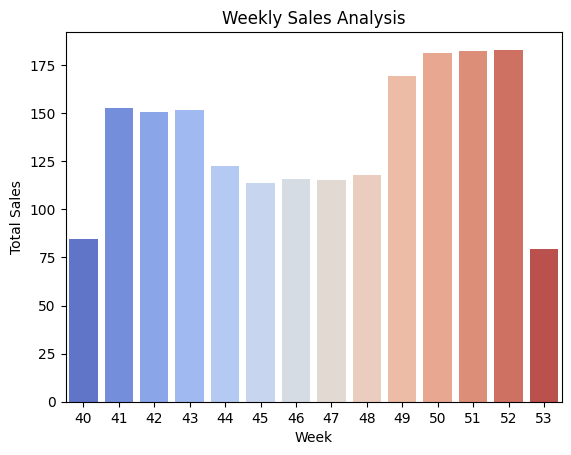

In [66]:
weekly_sales = data.groupby('Week')['Sales'].sum()

sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='coolwarm')
plt.title('Weekly Sales Analysis')
plt.xlabel('Week')
plt.ylabel('Total Sales')
plt.show()


### Monthly Sales Chart

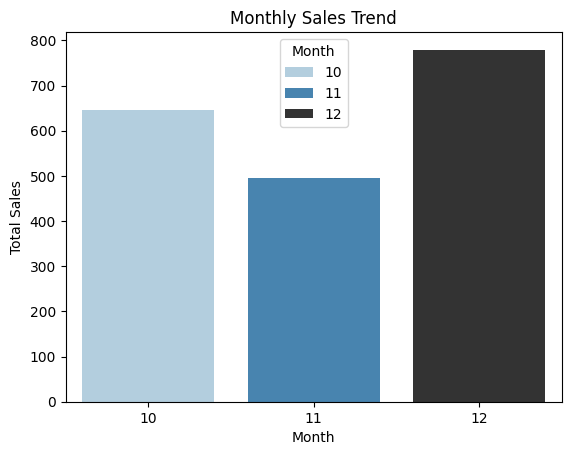

In [67]:
monthly_sales = data.groupby('Month')['Sales'].sum()

sns.barplot(x=monthly_sales.index, y=monthly_sales.values, hue=monthly_sales.index, palette='Blues_d')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


C:\Users\Windows 11\AppData\Local\Temp\ipykernel_3796\183445548.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_sales.index, y=weekly_sales.values, ax=axes[2, 0], palette='cool')


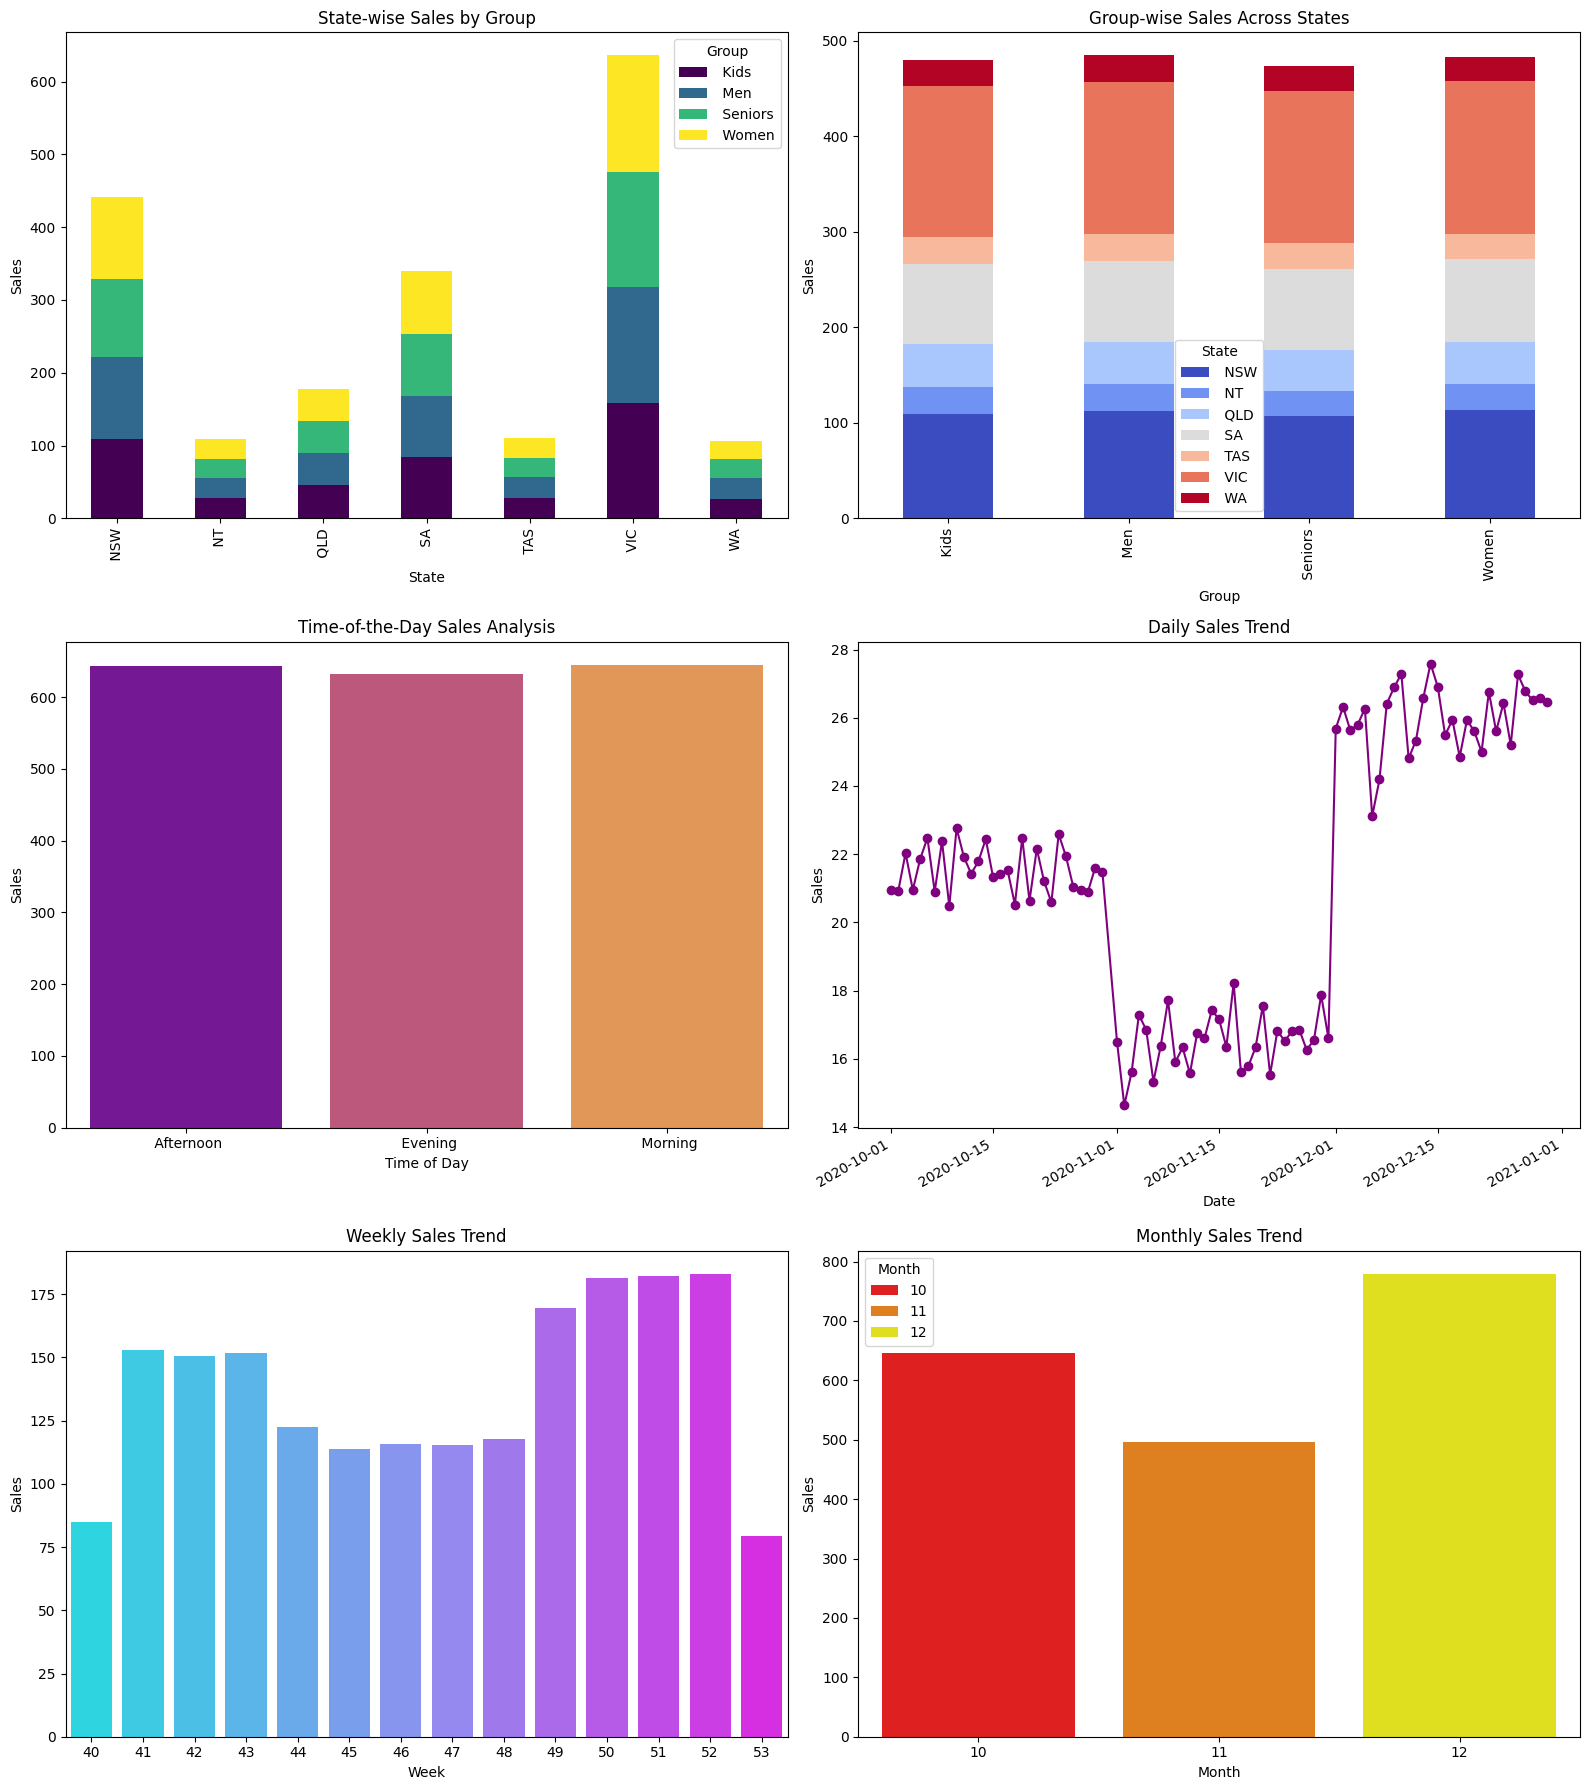

In [69]:
state_group_sales = data.groupby(['State', 'Group'])['Sales'].sum().unstack()
group_state_sales = data.groupby(['Group', 'State'])['Sales'].sum().unstack()
time_sales = data.groupby('Time')['Sales'].sum()
daily_sales = data.groupby('Date')['Sales'].sum()
weekly_sales = data.groupby('Week')['Sales'].sum()
monthly_sales = data.groupby('Month')['Sales'].sum()

fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Plot 1: State-wise Sales Analysis for Different Demographic Groups
state_group_sales.plot(kind='bar', stacked=True, ax=axes[0, 0], colormap='viridis')
axes[0, 0].set_title('State-wise Sales by Group')
axes[0, 0].set_xlabel('State')
axes[0, 0].set_ylabel('Sales')

# Plot 2: Group-wise Sales Analysis Across States
group_state_sales.plot(kind='bar', stacked=True, ax=axes[0, 1], colormap='coolwarm')
axes[0, 1].set_title('Group-wise Sales Across States')
axes[0, 1].set_xlabel('Group')
axes[0, 1].set_ylabel('Sales')

# Plot 3: Time-of-the-Day Sales Analysis
sns.barplot(x=time_sales.index, y=time_sales.values, ax=axes[1, 0], hue=time_sales.index, palette='plasma')
axes[1, 0].set_title('Time-of-the-Day Sales Analysis')
axes[1, 0].set_xlabel('Time of Day')
axes[1, 0].set_ylabel('Sales')

# Plot 4: Daily Sales Trend
daily_sales.plot(kind='line', marker='o', ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Daily Sales Trend')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Sales')

# Plot 5: Weekly Sales Trend
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, ax=axes[2, 0], palette='cool')
axes[2, 0].set_title('Weekly Sales Trend')
axes[2, 0].set_xlabel('Week')
axes[2, 0].set_ylabel('Sales')

# Plot 6: Monthly Sales Trend
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, ax=axes[2, 1], hue=monthly_sales.index, palette='autumn')
axes[2, 1].set_title('Monthly Sales Trend')
axes[2, 1].set_xlabel('Month')
axes[2, 1].set_ylabel('Sales')

plt.tight_layout()
plt.show()
